Свои комментарии я буду оставлять в таких ячейках:

<div class="alert alert-block alert-success">
<b>Хорошо:</b> Все сделано верно
</div>

<div class="alert alert-block alert-warning">
<b>Замечания: </b> Есть что улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Необходимо исправить:</b> Требуется изменить код. С такими ошибками проект не принимается.
</div>

1.	Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2.	Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3.	Как распределяется бюджет на разные группы (department) с течением времени?
4.	Какое количество людей в каждом департаменте? 
5.	Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
6.	На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#отображение формата сумм
pd.options.display.float_format ='{:,.2f}'.format

In [3]:
df_salary = pd.read_csv('Salaries.csv')

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
## изменяем тип данных соответствующих столбцов c целью возможности проводить над ними математические операции
df_salary['BasePay'] = pd.to_numeric(df_salary['BasePay'], errors='coerce')
df_salary['OvertimePay'] = pd.to_numeric(df_salary['OvertimePay'], errors='coerce')
df_salary['OtherPay'] = pd.to_numeric(df_salary['OtherPay'], errors='coerce')
df_salary['Benefits'] = pd.to_numeric(df_salary['Benefits'], errors='coerce')

<div class="alert alert-block alert-warning">
<b>Замечания: </b> По идее тут надо бы и с 12 столбцом разобраться
</div>

In [14]:
df_salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"167,411.18",0.00,"400,184.25",NaN,"567,595.43","567,595.43",2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),"155,966.02","245,131.88","137,811.38",NaN,"538,909.28","538,909.28",2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),"212,739.13","106,088.18","16,452.60",NaN,"335,279.91","335,279.91",2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,"77,916.00","56,120.71","198,306.90",NaN,"332,343.61","332,343.61",2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)","134,401.60","9,737.00","182,234.59",NaN,"326,373.19","326,373.19",2011,NaN,San Francisco,NaN


In [15]:
#удаляем ненужные столбцы
df_salary.drop(['Notes', 'Agency', 'Status' ], axis=1 , inplace=True)
df_salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"167,411.18",0.00,"400,184.25",NaN,"567,595.43","567,595.43",2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),"155,966.02","245,131.88","137,811.38",NaN,"538,909.28","538,909.28",2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),"212,739.13","106,088.18","16,452.60",NaN,"335,279.91","335,279.91",2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,"77,916.00","56,120.71","198,306.90",NaN,"332,343.61","332,343.61",2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)","134,401.60","9,737.00","182,234.59",NaN,"326,373.19","326,373.19",2011


<div class="alert alert-block alert-warning">
<b>Замечания: </b> Не совсем понятно зачем оставил поля Id и EmployeeName
</div>

In [16]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 11.3+ MB


<div class="alert alert-block alert-warning">
<b>Замечания: </b> Рекомендую это поставить в начало после импорта данных
</div>

In [18]:
df_salary['JobTitle'] = df_salary['JobTitle'].str.lower()


In [39]:
def check_department(df): 
    if 'police' in df.JobTitle:
        return 'police' 
    if 'fire' in df.JobTitle:
        return 'fire' 
    if 'medical' in df.JobTitle:
        return 'medical'

df_salary['department'] = df_salary.apply(check_department,axis=1)

<div class="alert alert-block alert-success">
Отлично
</div>

In [40]:
df_salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,department
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,"167,411.18",0.00,"400,184.25",NaN,"567,595.43","567,595.43",2011,None
1,2,GARY JIMENEZ,captain iii (police department),"155,966.02","245,131.88","137,811.38",NaN,"538,909.28","538,909.28",2011,police
2,3,ALBERT PARDINI,captain iii (police department),"212,739.13","106,088.18","16,452.60",NaN,"335,279.91","335,279.91",2011,police
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,"77,916.00","56,120.71","198,306.90",NaN,"332,343.61","332,343.61",2011,None
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)","134,401.60","9,737.00","182,234.59",NaN,"326,373.19","326,373.19",2011,fire


In [42]:
df_salary_final = df_salary[df_salary['department'].notnull()]

In [43]:
df_salary_final.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,department
1,2,GARY JIMENEZ,captain iii (police department),"155,966.02","245,131.88","137,811.38",NaN,"538,909.28","538,909.28",2011,police
2,3,ALBERT PARDINI,captain iii (police department),"212,739.13","106,088.18","16,452.60",NaN,"335,279.91","335,279.91",2011,police
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)","134,401.60","9,737.00","182,234.59",NaN,"326,373.19","326,373.19",2011,fire
6,7,ALSON LEE,"battalion chief, (fire department)","92,492.01","89,062.90","134,426.14",NaN,"315,981.05","315,981.05",2011,fire
8,9,MICHAEL MORRIS,"battalion chief, (fire department)","176,932.64","86,362.68","40,132.23",NaN,"303,427.55","303,427.55",2011,fire


In [44]:
df_salary_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15767 entries, 1 to 148561
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                15767 non-null  int64  
 1   EmployeeName      15767 non-null  object 
 2   JobTitle          15767 non-null  object 
 3   BasePay           15722 non-null  float64
 4   OvertimePay       15767 non-null  float64
 5   OtherPay          15767 non-null  float64
 6   Benefits          11365 non-null  float64
 7   TotalPay          15767 non-null  float64
 8   TotalPayBenefits  15767 non-null  float64
 9   Year              15767 non-null  int64  
 10  department        15767 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.4+ MB


<div class="alert alert-block alert-danger">
Тут не хватает вывода по итогам предобработки данных

- 1
- 2
- N-ое
</div>

<font color='green'> 
Ответ на вопрос №1:
Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? 
(максимальная, медианная, средняя)
</font>



In [45]:
df_salary_final.groupby(['department', 'Year']).BasePay.agg(['max', 'mean', 'median'])

max       mean     median
department Year                                 
fire       2011 285,262.00 106,549.27 105,934.67
           2012 296,943.01 109,222.65 110,847.10
           2013 313,686.01 116,159.28 116,956.71
           2014 302,068.00 108,179.29 112,703.72
medical    2011 257,510.59  57,342.25  53,822.61
           2012 254,878.82  53,843.10  56,968.71
           2013 271,831.50  55,630.66  59,834.00
           2014 268,946.02  56,816.50  60,364.97
police     2011 261,717.60 105,981.21 111,976.14
           2012 302,578.00  96,229.01 111,549.69
           2013 319,275.01 102,405.84 118,618.94
           2014 307,450.04  93,872.06 112,164.03

<font color='green'> 
Ответ на вопрос №2: Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами?
Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
</font>

Вариант 1. Построить 3 диаграмммы в каждой будут все департаменты, но различный стобец BasePay, OvertimePay, Benefits

In [46]:
a = df_salary_final.groupby(['department', 'Year']).BasePay.sum().unstack()
b = df_salary_final.groupby(['department', 'Year']).OvertimePay.sum().unstack()
c = df_salary_final.groupby(['department', 'Year']).Benefits.sum().unstack()

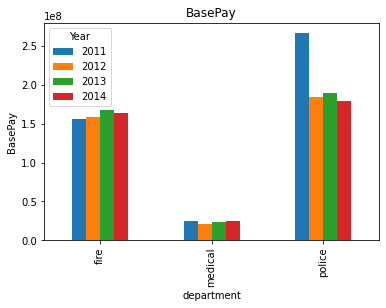

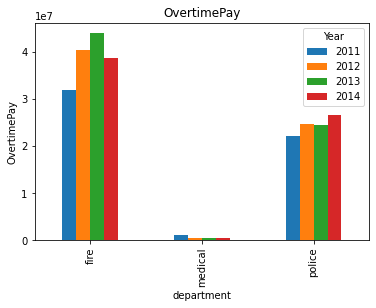

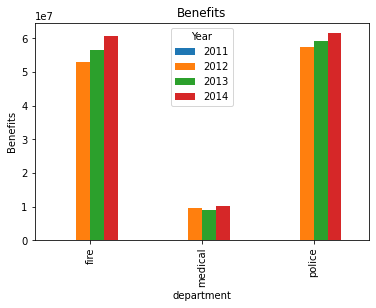

In [47]:
a.plot(kind='bar')
plt.xlabel('department')
plt.ylabel('BasePay')
plt.title('BasePay')


b.plot(kind='bar')
plt.xlabel('department')
plt.ylabel('OvertimePay')
plt.title('OvertimePay')


c.plot(kind='bar')
plt.xlabel('department')
plt.ylabel('Benefits')
plt.title('Benefits')
plt.show()

Вариант 2. Объединить в один график весь запрос

In [51]:
b = df_salary_final.groupby(['department', 'Year'])['BasePay', 'OvertimePay','Benefits'].sum()
b

<ipython-input-51-ea14a8eec37f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = df_salary_final.groupby(['department', 'Year'])['BasePay', 'OvertimePay','Benefits'].sum()


BasePay   OvertimePay      Benefits
department Year                                           
fire       2011 155,455,383.78 31,898,485.78          0.00
           2012 158,263,615.25 40,499,542.12 52,859,030.29
           2013 167,153,208.63 43,978,891.99 56,620,946.76
           2014 163,458,903.42 38,625,129.76 60,707,949.89
medical    2011  24,714,507.64  1,135,499.38          0.00
           2012  21,160,338.69    516,335.45  9,703,275.84
           2013  23,643,032.57    520,985.76  9,108,516.82
           2014  24,885,626.79    544,616.97 10,195,686.16
police     2011 266,224,811.51 22,225,776.17          0.00
           2012 184,663,462.87 24,739,129.82 57,429,170.22
           2013 188,938,768.37 24,573,767.45 59,201,909.16
           2014 178,450,786.62 26,684,074.32 61,511,276.28

<div class="alert alert-block alert-danger">
Ошибку можно устранить так
    
    
[['BasePay', 'OvertimePay','Benefits']]
</div>

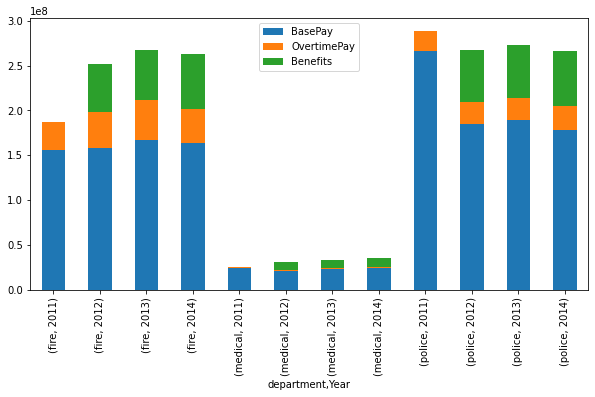

In [52]:
b.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.show()

Вариант 3 посроение диаграмм по каждому департаменту отдельно

In [53]:
df_p = df_salary_final[df_salary_final['department'] == 'police']
df_m = df_salary_final[df_salary_final['department'] == 'medical']
df_f = df_salary_final[df_salary_final['department'] == 'fire']
f_p = df_p.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()
f_m = df_m.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()
f_f = df_f.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()

<ipython-input-53-ed4cf0d43fa4>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  f_p = df_p.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()
<ipython-input-53-ed4cf0d43fa4>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  f_m = df_m.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()
<ipython-input-53-ed4cf0d43fa4>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  f_f = df_f.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()


<div class="alert alert-block alert-danger">
Ошибку можно устранить так
    
    
[['BasePay', 'OvertimePay','Benefits']]
</div>

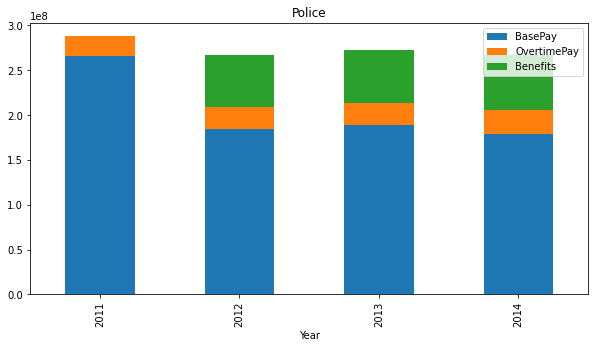

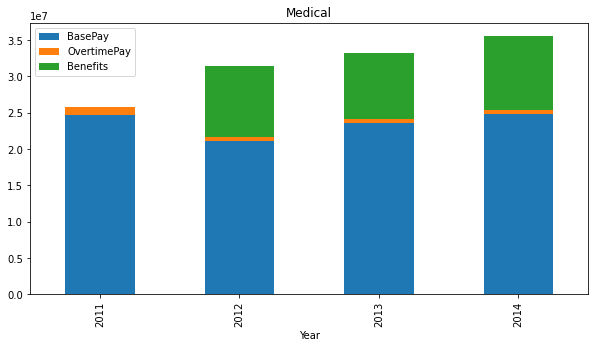

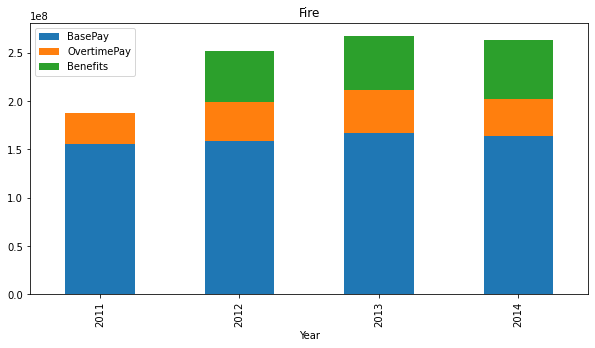

In [54]:
f_p.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Police')


f_m.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Medical')


f_f.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Fire')
plt.show()

<div class="alert alert-block alert-success">
Наглядно, хорошо
</div>

<font color='green'>
Ответ на вопрос №3: Как распределяется бюджет на разные группы (department) с течением времени?
</font>

In [56]:
df_salary_final.groupby(['department', 'Year']).TotalPay.sum().unstack()

Year,2011,2012,2013,2014
department,,,,
fire,"211,563,265.94","220,951,340.92","234,417,416.73","224,828,867.39"
medical,"26,921,486.59","22,129,406.34","24,673,510.08","25,937,858.19"
police,"319,268,095.21","223,101,452.92","229,526,362.43","220,500,252.80"


<font color='green'>
Ответ на вопрос №4: Какое количество людей в каждом департаменте?
</font>

In [58]:
df_salary_final.groupby(['department']).EmployeeName.count()

department
fire       5879
medical    1687
police     8201
Name: EmployeeName, dtype: int64

<font color='green'>
Ответ на вопрос №5: Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к)
</font>

In [59]:
#Определим количество групп с шагом 5к
df_salary_final['TotalPay'].max() / 5000

107.781856

<div class="alert alert-block alert-warning">
Это лучше заменить на что-то типа
    
round(df_salary_final['TotalPay'].max() / 5000) и передать в качестве параметра в график
</div>

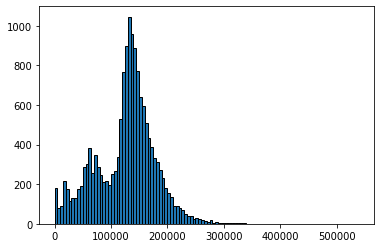

In [60]:
#построим гистограмму
from pylab import rcParams
hist_info = plt.hist(df_salary_final['TotalPay'], bins=108, edgecolor='black')
rcParams['figure.figsize'] = 15,10

plt.show()

<font color='green'>
Ответ на вопрос №6: На базе линейной регрессии постройте прогноз по тому, какие будут закупки в следующий год по каждому департаменту
</font>   

In [63]:
#прогнозируем по  police department
police_df = df_salary_final[df_salary_final['department'] == 'police']
police_df_copy =police_df[['Year' ,'BasePay', 'OvertimePay', 'OtherPay','Benefits','TotalPay', 'TotalPayBenefits']]
police_df_copy.head()

,Year,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
1,2011,"155,966.02","245,131.88","137,811.38",NaN,"538,909.28","538,909.28"
2,2011,"212,739.13","106,088.18","16,452.60",NaN,"335,279.91","335,279.91"
11,2011,"99,722.00","87,082.62","110,804.30",NaN,"297,608.92","297,608.92"
15,2011,"198,778.01","73,478.20","13,957.65",NaN,"286,213.86","286,213.86"
25,2011,"256,470.41",0.00,"11,522.18",NaN,"267,992.59","267,992.59"


In [64]:
g_p = police_df_copy.groupby(['Year']).TotalPayBenefits.sum().reset_index()
g_p

,Year,TotalPayBenefits
0,2011,"319,268,095.21"
1,2012,"280,530,623.14"
2,2013,"288,728,271.59"
3,2014,"282,011,529.08"


In [65]:
#Поскольку данных для тренировки и предсказания недостаточно, а именно всего 4 периода, принято решение о 
#построении простой линейной регресии. 
x_p = g_p['Year'].values.reshape((-1, 1))
x_p

array([[2011],
       [2012],
       [2013],
       [2014]])

In [66]:
y_p = g_p['TotalPayBenefits'].values
y_p

array([3.19268095e+08, 2.80530623e+08, 2.88728272e+08, 2.82011529e+08])

In [67]:
model = LinearRegression()

In [68]:
model.fit(x_p, y_p)

LinearRegression()

In [69]:
r_sq = model.score(x_p, y_p)
print('coefficient of determination:', r_sq.round(2))

coefficient of determination: 0.55


In [70]:
y_p_pred = model.predict(x_p)
print('predicted response:', y_p_pred)

predicted response: [3.08170437e+08 2.97813232e+08 2.87456027e+08 2.77098822e+08]


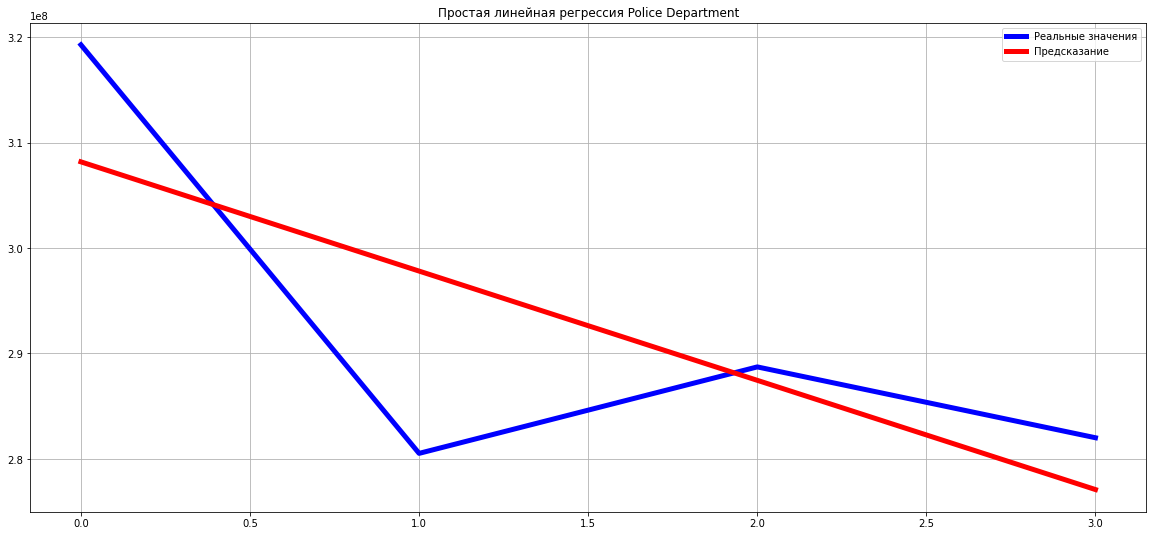

In [71]:
plt.figure(figsize=(20,9))
plt.plot(y_p, "blue",linewidth=5, label='Реальные значения')
plt.plot(y_p_pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("Простая линейная регрессия Police Department")
plt.grid(True)
plt.show()

In [72]:
x1_p = np.array([2015]).reshape(1, -1)
y_p_pred = model.predict(x1_p)
print('Прогноз расходов Police Department на 2015 г. на основании простой линейной регрессии:', y_p_pred[0].round(2))

Прогноз расходов Police Department на 2015 г. на основании простой линейной регрессии: 266741617.27


In [73]:
#аналогично прогнозируем по fire department
fire_df = df_salary_final[df_salary_final['department'] == 'fire']
fire_df_copy =fire_df[['Year' ,'BasePay', 'OvertimePay', 'OtherPay','Benefits','TotalPay', 'TotalPayBenefits']]
fire_df_copy.head()

,Year,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
4,2011,"134,401.60","9,737.00","182,234.59",NaN,"326,373.19","326,373.19"
6,2011,"92,492.01","89,062.90","134,426.14",NaN,"315,981.05","315,981.05"
8,2011,"176,932.64","86,362.68","40,132.23",NaN,"303,427.55","303,427.55"
9,2011,"285,262.00",0.00,"17,115.73",NaN,"302,377.73","302,377.73"
10,2011,"194,999.39","71,344.88","33,149.90",NaN,"299,494.17","299,494.17"


In [74]:
g_f = fire_df_copy.groupby(['Year']).TotalPayBenefits.sum().reset_index()
g_f

,Year,TotalPayBenefits
0,2011,"211,563,265.94"
1,2012,"273,810,371.21"
2,2013,"291,038,363.49"
3,2014,"285,536,817.28"


In [75]:
x_f = g_f['Year'].values.reshape((-1, 1))
y_f = g_f['TotalPayBenefits'].values

In [76]:
model.fit(x_f, y_f)

LinearRegression()

In [77]:
r_sq = model.score(x_f, y_f)
print('coefficient of determination:', r_sq.round(2))

coefficient of determination: 0.71


In [78]:
y_f_pred = model.predict(x_f)
print('predicted response:', y_f_pred)

predicted response: [2.29614908e+08 2.53529772e+08 2.77444637e+08 3.01359501e+08]


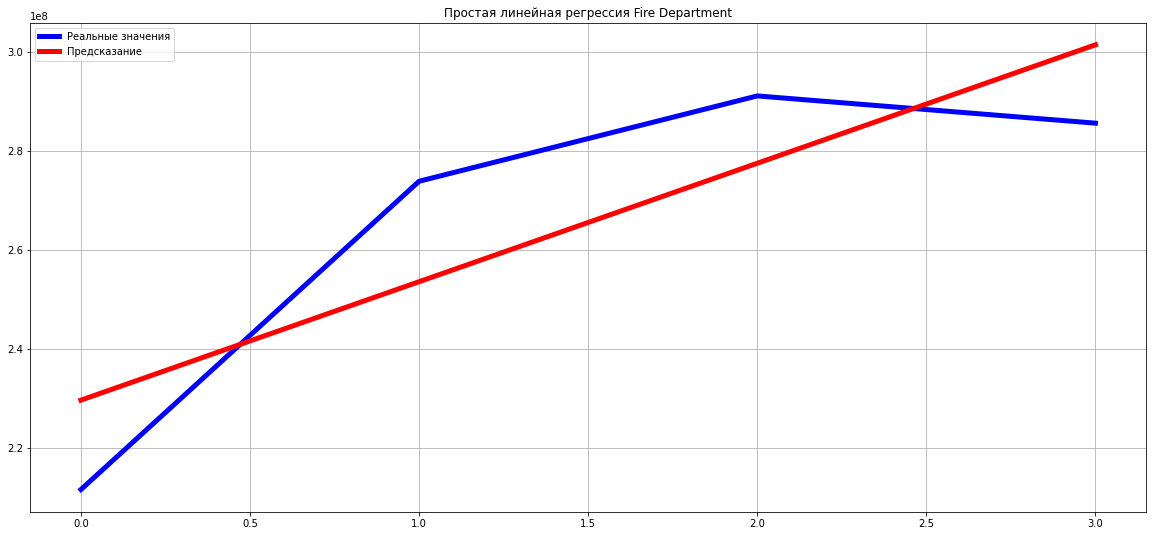

In [79]:
plt.figure(figsize=(20,9))
plt.plot(y_f, "blue",linewidth=5, label='Реальные значения')
plt.plot(y_f_pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("Простая линейная регрессия Fire Department")
plt.grid(True)
plt.show()

In [80]:
x1_f = np.array([2015]).reshape(1, -1)
y_f_pred = model.predict(x1_f)
print('Прогноз расходов Fire Department на 2015 г. на основании простой линейной регрессии:', y_f_pred[0].round(2))

Прогноз расходов Fire Department на 2015 г. на основании простой линейной регрессии: 325274366.06


In [81]:
# прогнозируем по medical department
medical_df = df_salary_final[df_salary_final['department'] == 'medical']
medical_df_copy =medical_df[['Year' ,'BasePay', 'OvertimePay', 'OtherPay','Benefits','TotalPay', 'TotalPayBenefits']]
medical_df_copy.head()

,Year,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
17,2011,"140,546.87","119,397.26","18,625.08",NaN,"278,569.21","278,569.21"
19,2011,"257,510.59",880.16,"16,159.50",NaN,"274,550.25","274,550.25"
20,2011,"257,510.48",0.00,"16,679.79",NaN,"274,190.27","274,190.27"
21,2011,"257,510.44",377.21,"15,883.56",NaN,"273,771.21","273,771.21"
36,2011,"245,124.44",0.00,"12,000.00",NaN,"257,124.44","257,124.44"


In [82]:
g_m = medical_df_copy.groupby(['Year']).TotalPayBenefits.sum().reset_index()
g_m

,Year,TotalPayBenefits
0,2011,"26,921,486.59"
1,2012,"31,832,682.18"
2,2013,"33,782,026.90"
3,2014,"36,133,544.35"


In [83]:
x_m = g_m['Year'].values.reshape((-1, 1))
y_m = g_m['TotalPayBenefits'].values

In [84]:
model.fit(x_m, y_m)

LinearRegression()

In [85]:
r_sq = model.score(x_m, y_m)
print('coefficient of determination:', r_sq.round(2))

coefficient of determination: 0.95


In [86]:
y_m_pred = model.predict(x_m)
print('predicted response:', y_m_pred.round(2))

predicted response: [27729607.3 30688159.1 33646710.9 36605262.7]


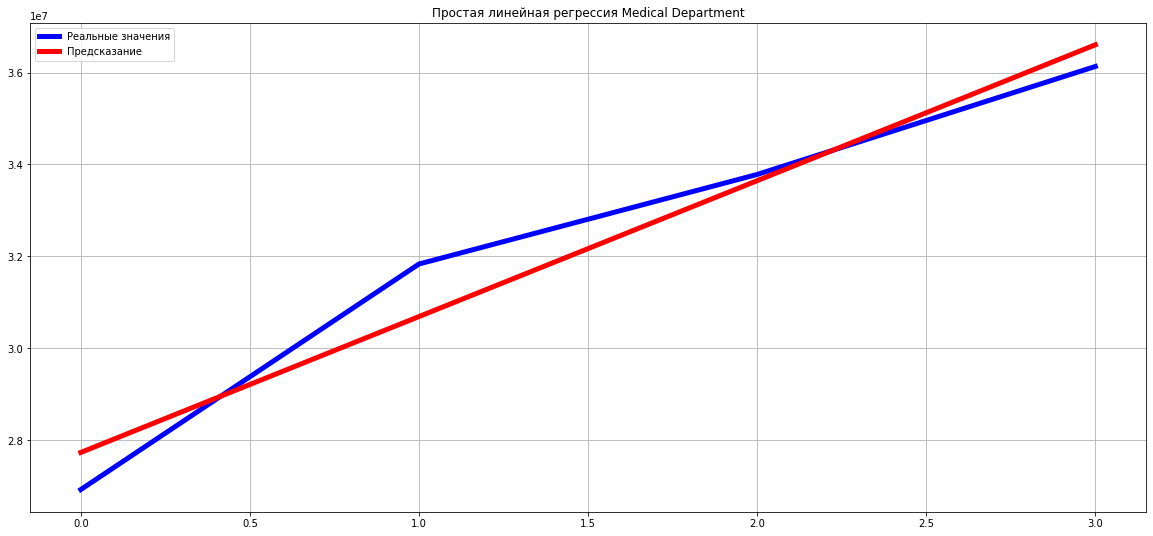

In [87]:
plt.figure(figsize=(20,9))
plt.plot(y_m, "blue",linewidth=5, label='Реальные значения')
plt.plot(y_m_pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("Простая линейная регрессия Medical Department")
plt.grid(True)
plt.show()

In [88]:
x1_m = np.array([2015]).reshape(1, -1)
y_m_pred = model.predict(x1_m)
print('Прогноз расходов Medical Department на 2015 г. на основании простой линейной регрессии:', y_m_pred[0].round(2))

Прогноз расходов Medical Department на 2015 г. на основании простой линейной регрессии: 39563814.51


<div class="alert alert-block alert-danger">
    
* Здесь у тебя явно переиспользование одного и того же кода 3 раза,сделай это циклом
    
* Использовуй понятные названия переменных вместо x_m, g_m и т.п. это делает твой код трудночитаемым
    
* И самое главное - **нет итогового вывода о задаче**, прогнозе и т.п. Твой заказчик не будет смотреть код, только итог
</div>

<div class="alert alert-block alert-success">
Ты близок к завершению! Еще одно усилие :)
</div>